In [1]:
import requests
import pandas as pd

baseurl = "https://data.cityofchicago.org/resource/6zsd-86xi.json"

r = requests.get(baseurl)

print(r)

if r.status_code == 200:
    crime_data = r.json()

    crime_df = pd.DataFrame(crime_data)

    print(crime_df.head(2))
else:
    print("Failed to fetch data from the API.")

<Response [200]>
         id case_number                     date  \
0  13430895    JH227151  2024-04-16T00:00:00.000   
1  13430783    JH227177  2024-04-16T00:00:00.000   

                                 block  iucr     primary_type description  \
0  065XX S DR MARTIN LUTHER KING JR DR  0460          BATTERY      SIMPLE   
1                105XX S VINCENNES AVE  1320  CRIMINAL DAMAGE  TO VEHICLE   

  location_description  arrest  domestic  ... location_zip  \
0            APARTMENT    True     False  ...                
1               STREET   False     False  ...                

  :@computed_region_awaf_s7ux :@computed_region_6mkv_f3dw  \
0                          53                       22260   
1                          33                       22212   

  :@computed_region_vrxf_vc4k :@computed_region_bdys_3d7i  \
0                           9                         332   
1                          72                         595   

  :@computed_region_43wa_7qmu :@compute

In [ ]:
crime_df.dtypes

id                             object
case_number                    object
date                           object
block                          object
iucr                           object
primary_type                   object
description                    object
location_description           object
arrest                           bool
domestic                         bool
beat                           object
district                       object
ward                           object
community_area                 object
fbi_code                       object
x_coordinate                   object
y_coordinate                   object
year                           object
updated_on                     object
latitude                       object
longitude                      object
location                       object
location_address               object
location_city                  object
location_state                 object
location_zip                   object
:@computed_r

In [ ]:
import pandas as pd

# Converting the 'date' column to datetime format first
crime_df['date'] = pd.to_datetime(crime_df['date'])


In [ ]:
crime_df.dropna(inplace=True)

In [ ]:
crime_df.drop(columns=[":@computed_region_8hcu_yrd4", ":@computed_region_d3ds_rm58", ":@computed_region_d9mm_jgwp", ":@computed_region_rpca_8um6", ":@computed_region_43wa_7qmu", ":@computed_region_bdys_3d7i", ":@computed_region_vrxf_vc4k", ":@computed_region_6mkv_f3dw"], inplace=True)


In [ ]:
selected_columns = [
    'id', 'case_number', 'date', 'block', 'iucr', 'primary_type', 'description',
    'location_description', 'arrest', 'domestic', 'beat', 'district', 'ward',
    'community_area', 'fbi_code', 'year',
    'updated_on', 'latitude', 'longitude', 'location_address',
    'location_city', 'location_state', 'location_zip'
]


new_crime_df = crime_df[selected_columns].copy()


data_types = {
    'id': 'int',
    'case_number': 'string',
    'date': 'datetime64[ns]', # Convert to datetime data type
    'block': 'string',
    'iucr': 'string',
    'primary_type': 'string',
    'description': 'string',
    'location_description': 'string',
    'arrest': 'bool',
    'domestic': 'bool',
    'beat': 'string',
    'district': 'string',
    'ward': 'object',
    'community_area': 'string',
    'fbi_code': 'object',
    'year': 'object',
    'updated_on': 'datetime64[ns]',  # Convert to datetime data type
    'latitude': 'float64',  # Convert to float data type
    'longitude': 'float64',
    'location_address': 'string',
    'location_city': 'string',
    'location_state': 'string',
    'location_zip': 'string'
}

new_crime_df= new_crime_df.astype(data_types)

# Display the data types of the new DataFrame
print(new_crime_df.dtypes)


id                               int64
case_number             string[python]
date                    datetime64[ns]
block                   string[python]
iucr                    string[python]
primary_type            string[python]
description             string[python]
location_description    string[python]
arrest                            bool
domestic                          bool
beat                    string[python]
district                string[python]
ward                            object
community_area          string[python]
fbi_code                        object
year                            object
updated_on              datetime64[ns]
latitude                       float64
longitude                      float64
location_address        string[python]
location_city           string[python]
location_state          string[python]
location_zip            string[python]
dtype: object


In [ ]:
new_crime_df.drop(columns=['location_address', 'location_city', 'location_state', 'location_zip'], inplace=True)

In [ ]:
new_crime_df.dtypes

id                               int64
case_number             string[python]
date                    datetime64[ns]
block                   string[python]
iucr                    string[python]
primary_type            string[python]
description             string[python]
location_description    string[python]
arrest                            bool
domestic                          bool
beat                    string[python]
district                string[python]
ward                            object
community_area          string[python]
fbi_code                        object
year                            object
updated_on              datetime64[ns]
latitude                       float64
longitude                      float64
dtype: object

In [ ]:
new_crime_df

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,year,updated_on,latitude,longitude
0,13431715,JH228235,2024-04-14 00:00:00,002XX E HURON ST,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,HOSPITAL BUILDING / GROUNDS,False,False,1834,018,2,8,02,2024,2024-04-21 15:40:50,41.895003,-87.621528
1,13429030,JH224976,2024-04-14 00:00:00,062XX S MICHIGAN AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,0311,003,20,40,08B,2024,2024-04-21 15:40:50,41.780946,-87.621995
2,13428596,JH224360,2024-04-14 00:00:00,023XX E 93RD ST,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,HOSPITAL BUILDING / GROUNDS,False,False,0413,004,7,48,02,2024,2024-04-21 15:40:50,41.726219,-87.567294
3,13428850,JH224732,2024-04-14 00:00:00,017XX E 86TH PL,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,0412,004,8,45,07,2024,2024-04-21 15:40:50,41.737879,-87.581669
4,13428796,JH224490,2024-04-14 00:00:00,0000X W 111TH ST,0820,THEFT,$500 AND UNDER,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,0522,005,9,49,06,2024,2024-04-21 15:40:50,41.692566,-87.624705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,13427086,JH222603,2024-04-12 15:15:00,034XX N OSCEOLA AVE,0460,BATTERY,SIMPLE,SCHOOL - PUBLIC GROUNDS,False,False,1631,016,38,17,08B,2024,2024-04-20 15:41:25,41.942249,-87.813008
996,13427210,JH222557,2024-04-12 15:15:00,001XX N STATE ST,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,True,False,0111,001,34,32,06,2024,2024-04-20 15:41:25,41.883500,-87.627877
997,13427119,JH222598,2024-04-12 15:14:00,002XX S HAMLIN BLVD,0810,THEFT,OVER $500,APARTMENT,False,False,1122,011,28,26,06,2024,2024-04-20 15:41:25,41.877756,-87.720642
998,13427383,JH222601,2024-04-12 15:14:00,008XX N CENTRAL AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,True,1511,015,29,25,04B,2024,2024-04-20 15:41:25,41.895080,-87.765400


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

categorical_columns = ['location_description','primary_type']

features = [
     'latitude', 'longitude','arrest', 'domestic'
] + categorical_columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse=False), categorical_columns),  # Use sparse=False for dense matrix
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),  # Scale numerical features
    ('kmeans', KMeans(n_clusters=3, random_state=42))  # Perform KMeans clustering
])

X = new_crime_df[features]

pipeline.fit(X)

cluster_labels = pipeline.named_steps['kmeans'].labels_

new_crime_df['cluster'] = cluster_labels

cluster_explanation = {
    0: "High Crime Rate Areas with frequent arrests and domestic incidents in public locations.",
    1: "Moderate Crime Rate Areas with occasional arrests and domestic incidents in residential or private properties.",
    2: "Low Crime Rate Areas with rare or no arrests and domestic incidents in commercial or business districts."
}

for cluster, explanation in cluster_explanation.items():
    print(f"Cluster {cluster}: {explanation}")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0: High Crime Rate Areas with frequent arrests and domestic incidents in public locations.
Cluster 1: Moderate Crime Rate Areas with occasional arrests and domestic incidents in residential or private properties.
Cluster 2: Low Crime Rate Areas with rare or no arrests and domestic incidents in commercial or business districts.


In [ ]:
cluster_counts = new_crime_df['cluster'].value_counts()
print(cluster_counts)

cluster
2    468
1    299
0    220
Name: count, dtype: int64


In [ ]:
file_path = 'final_dataframe_with_labels.csv'

# Convert the dataframe to CSV
new_crime_df.to_csv(file_path, index=False)

print("CSV file saved successfully at:", file_path)


CSV file saved successfully at: final_dataframe_with_labels.csv


Now our labels are :
- Cluster 0: High Crime Rate Areas with frequent arrests and domestic incidents in public locations.
- Cluster 1: Moderate Crime Rate Areas with occasional arrests and domestic incidents in residential or private properties.
- Cluster 2: Low Crime Rate Areas with rare or no arrests and domestic incidents in commercial or business districts.

We will use above labeled CSV to perform SVM on our data.

In [5]:
new_crime_df= pd.read_csv("/content/final_dataframe_with_labels (2).csv")

## Now applying SVM to out labeled data (labels created using clustering).

1) Data Preperation:

In [6]:
from sklearn.preprocessing import LabelEncoder

# Filling missing values in 'arrest' and 'domestic' columns with False
new_crime_df['arrest'] = new_crime_df['arrest'].fillna(False)
new_crime_df['domestic'] = new_crime_df['domestic'].fillna(False)

# Converting 'arrest' and 'domestic' columns to boolean
new_crime_df['arrest'] = new_crime_df['arrest'].astype(bool)
new_crime_df['domestic'] = new_crime_df['domestic'].astype(bool)

# Encoding the data
label_encoder = LabelEncoder()

string_columns = ['case_number', 'block', 'iucr', 'primary_type', 'description',
                  'location_description', 'beat', 'district', 'ward',
                  'community_area', 'fbi_code', 'year']

for col in string_columns:
    new_crime_df[col] = label_encoder.fit_transform(new_crime_df[col])

In [9]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
# Define preprocessing steps for numerical and categorical columns
numeric_features = ['latitude', 'longitude']
numeric_transformer = StandardScaler()

categorical_features = ['case_number', 'block', 'iucr', 'primary_type', 'description',
                        'location_description', 'beat', 'district', 'ward',
                        'community_area', 'fbi_code', 'year']
categorical_transformer = OneHotEncoder()

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

2) Splitting data into training and testing sets:

In [24]:
from sklearn.model_selection import train_test_split

# Spliting data into features (X) and target (y)
X = new_crime_df.drop(columns=['cluster', 'date', 'updated_on'])  # Assuming 'cluster' is the target variable
y = new_crime_df['cluster']

# Split data into Training and Testing sets without resampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
X_train

,id,case_number,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,year,latitude,longitude
756,13427352,133,30,38,20,73,47,False,False,198,16,1,7,6,0,41.901873,-87.629199
716,13427475,167,48,64,21,86,49,True,False,132,10,26,25,13,0,41.879649,-87.686393
49,13428577,693,177,3,17,18,11,False,False,124,10,36,20,2,0,41.898176,-87.726170
718,13430105,905,213,37,20,0,49,False,False,141,11,26,25,6,0,41.886687,-87.654798
371,13428084,473,363,58,5,81,26,True,False,145,11,26,25,19,0,41.881183,-87.684982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,13431788,951,28,86,10,50,7,True,False,198,16,1,7,17,0,41.903932,-87.629309
270,13428682,740,766,56,3,82,3,False,False,31,2,5,65,12,0,41.759750,-87.610285
860,13427222,55,7,64,21,86,49,True,False,202,16,41,7,13,0,41.894079,-87.627797
435,13428276,525,821,19,1,33,38,False,True,59,5,17,67,9,0,41.740715,-87.669264


In [12]:
X_test

,id,case_number,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,year,latitude,longitude
309,13428337,494,147,30,0,74,42,False,False,147,11,27,25,8,0,41.872612,-87.677590
139,13428438,736,805,24,0,3,49,False,False,62,5,16,41,3,0,41.748380,-87.631817
499,13430830,929,769,42,11,23,49,False,False,63,5,5,65,7,0,41.758125,-87.605377
854,13427265,107,83,37,20,0,25,False,False,202,16,1,7,6,0,41.894230,-87.618962
88,13434375,984,107,15,1,74,3,False,False,3,0,41,29,9,0,41.886945,-87.615529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,13428386,555,505,24,0,3,49,False,False,87,7,11,54,3,0,41.820564,-87.704462
628,13427761,278,3,5,17,75,49,False,False,30,2,5,65,2,0,41.765571,-87.622092
456,13428082,383,561,38,20,73,26,True,False,223,18,46,3,6,0,41.968891,-87.688914
536,13427834,335,95,15,1,74,40,False,False,2,0,3,29,9,0,41.877726,-87.628737


In [13]:
y_train.head(15)

756    0
716    2
49     2
718    0
371    2
538    0
351    2
891    0
530    2
333    2
981    2
237    1
853    0
33     1
31     2
Name: cluster, dtype: int64

In [14]:
y_test.head(15)

309    2
139    2
499    2
854    0
88     1
398    0
905    0
107    1
59     1
534    1
168    2
136    2
70     2
96     1
652    1
Name: cluster, dtype: int64

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Identifying categorical and numerical columns in X_train
categorical_columns = [col for col in X_train.columns if X_train[col].dtype == 'object']
numerical_columns = [col for col in X_train.columns if X_train[col].dtype != 'object']

# Creating preprocessing pipelines for categorical data
categorical_preprocessing = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Creating preprocessing pipelines for numerical data
numerical_preprocessing = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Combining preprocessing steps with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_preprocessing, numerical_columns),
        ('cat', categorical_preprocessing, categorical_columns)
    ]
)

# Fitting the preprocessor on the training data
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['id', 'case_number', 'block', 'iucr',
                                  'primary_type', 'description',
                                  'location_description', 'arrest', 'domestic',
                                  'beat', 'district', 'ward', 'community_area',
                                  'fbi_code', 'year', 'latitude',
                                  'longitude']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 [])])

In [25]:
X_train_1 = preprocessor.transform(X_train)

X_test_1 = preprocessor.transform(X_test)

3) Applying SVM:

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Initializing and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

dt_classifier.fit(X_train_1, y_train)

# Predicting on the testing set
y_pred_dt = dt_classifier.predict(X_test_1)

# Evaluating the Decision Tree classifier
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(conf_matrix_dt)
print("Decision Tree Accuracy:", accuracy_dt)

[[41  1  6]
 [ 1 51  6]
 [ 1  1 90]]
Decision Tree Accuracy: 0.9191919191919192


## SVM:


In [18]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

1) Linear Kernel:

Accuracy: 0.8383838383838383
Confusion Matrix:
[[38  1  9]
 [ 1 50  7]
 [ 9  5 78]]


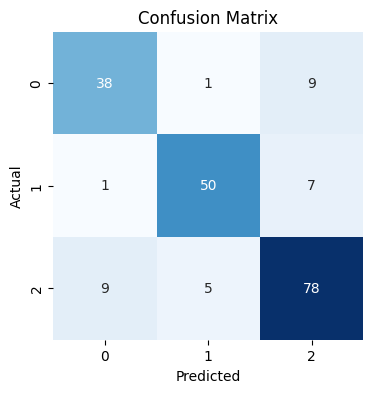

In [56]:

svm_model = SVC(kernel='linear', C=0.1)  # Ensure multiclass classification
svm_model.fit(X_train_1, y_train)

y_pred = svm_model.predict(X_test_1)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.8939393939393939
Confusion Matrix:
[[40  1  7]
 [ 0 49  9]
 [ 0  4 88]]


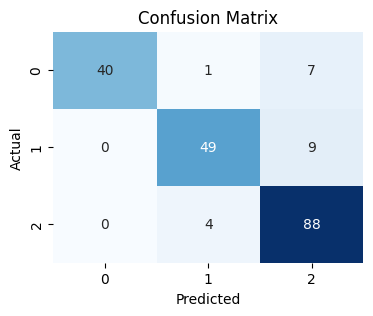

In [58]:

svm_model = SVC(kernel='linear', C=1)  # Ensure multiclass classification
svm_model.fit(X_train_1, y_train)

y_pred = svm_model.predict(X_test_1)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.898989898989899
Confusion Matrix:
[[40  1  7]
 [ 0 50  8]
 [ 0  4 88]]


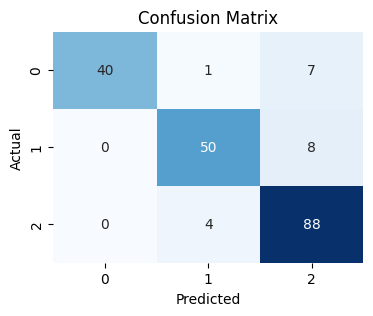

In [59]:

svm_model = SVC(kernel='linear', C= 10)  # Ensure multiclass classification
svm_model.fit(X_train_1, y_train)

y_pred = svm_model.predict(X_test_1)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


2) rbf Kernel:

Accuracy: 0.7424242424242424
Confusion Matrix:
[[21  0 27]
 [ 1 34 23]
 [ 0  0 92]]


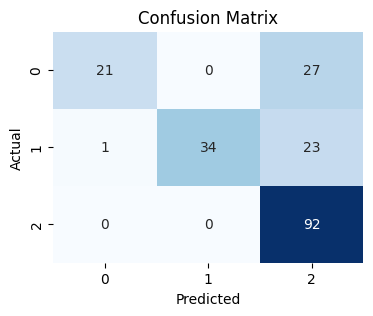

In [60]:

svm_model = SVC(kernel='rbf', C= 0.1)  # Ensure multiclass classification
svm_model.fit(X_train_1, y_train)

y_pred = svm_model.predict(X_test_1)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(4,3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.8888888888888888
Confusion Matrix:
[[39  2  7]
 [ 1 49  8]
 [ 1  3 88]]


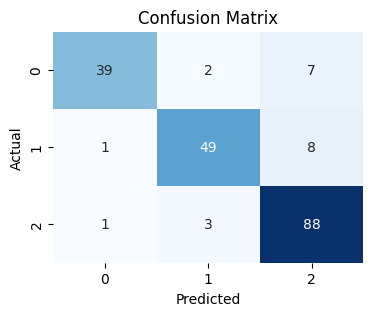

In [61]:

svm_model = SVC(kernel='rbf', C= 1)  # Ensure multiclass classification
svm_model.fit(X_train_1, y_train)

y_pred = svm_model.predict(X_test_1)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(4,3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.8686868686868687
Confusion Matrix:
[[41  1  6]
 [ 1 48  9]
 [ 1  8 83]]


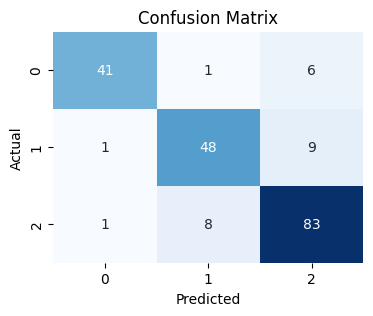

In [62]:

svm_model = SVC(kernel='rbf', C= 20)  # Ensure multiclass classification
svm_model.fit(X_train_1, y_train)

y_pred = svm_model.predict(X_test_1)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(4,3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


3) poly kernel:

Accuracy: 0.8636363636363636
Confusion Matrix:
[[38  1  9]
 [ 1 47 10]
 [ 2  4 86]]


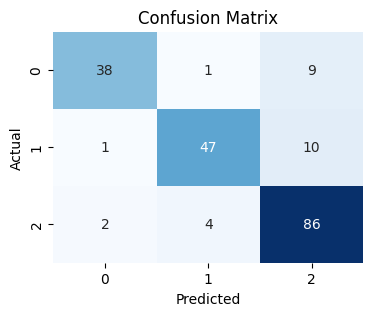

In [63]:

svm_model = SVC(kernel='poly', C= 5)  # Ensure multiclass classification
svm_model.fit(X_train_1, y_train)

y_pred = svm_model.predict(X_test_1)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(4,3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.6363636363636364
Confusion Matrix:
[[ 3  0 45]
 [ 0 31 27]
 [ 0  0 92]]


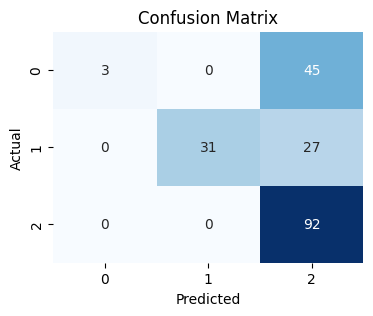

In [64]:

svm_model = SVC(kernel='poly', C= 0.1)  # Ensure multiclass classification
svm_model.fit(X_train_1, y_train)

y_pred = svm_model.predict(X_test_1)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.8585858585858586
Confusion Matrix:
[[38  1  9]
 [ 1 48  9]
 [ 2  6 84]]


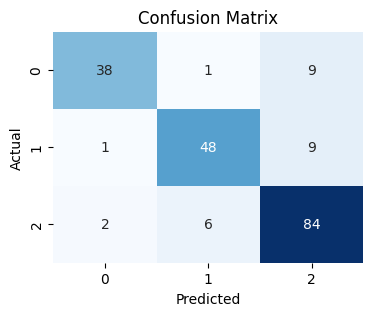

In [65]:

svm_model = SVC(kernel='poly', C= 20)  # Ensure multiclass classification
svm_model.fit(X_train_1, y_train)

y_pred = svm_model.predict(X_test_1)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Visualization of SVM results to comare different kerners and c values

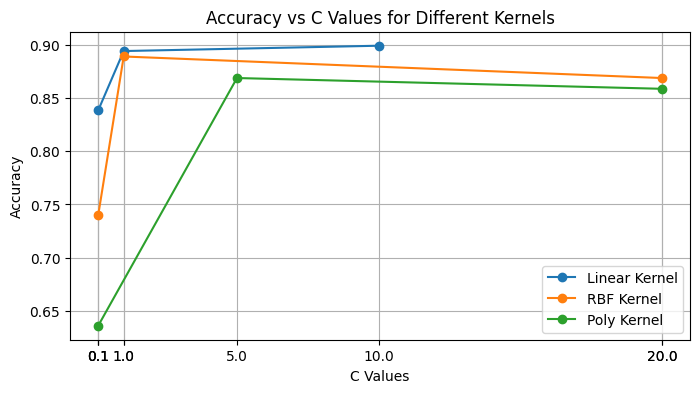

In [67]:
import matplotlib.pyplot as plt

# Accuracy values for different kernels and C values
accuracy_linear = [0.8383, 0.8939, 0.8989]
accuracy_rbf = [0.74, 0.8888, 0.8686]
accuracy_poly = [0.6363, 0.8686 , 0.8585]

# C values
C_values_linear = [0.1, 1, 10]
C_values_rbf = [0.1, 1, 20]
C_values_poly = [0.1, 5, 20]

# Plotting
plt.figure(figsize=(8,4))

plt.plot(C_values_linear, accuracy_linear, marker='o', label='Linear Kernel')
plt.plot(C_values_rbf, accuracy_rbf, marker='o', label='RBF Kernel')
plt.plot(C_values_poly, accuracy_poly, marker='o', label='Poly Kernel')

plt.title('Accuracy vs C Values for Different Kernels')
plt.xlabel('C Values')
plt.ylabel('Accuracy')
plt.xticks(C_values_linear + C_values_rbf + C_values_poly)
plt.legend()
plt.grid(True)
plt.show()


## Model's comparison:

1. **Linear Kernel vs. RBF and Polynomial Kernels:**
   - We observed that the linear kernel outperforms the RBF and polynomial kernels suggests that the data might be well-separated by linear boundaries.
   - This indicates that the decision boundary between classes may be more linear in nature.

2. **Effect of C Value:**
   - When C is set to a very low value (e.g., 0.1), the model might underfit the data, resulting in lower accuracy.
   - Whereas, increasing the C value to a very high number (e.g., 20) can lead to overfitting, as observed in the RBF kernel and poly kernel cases. This results in the model fitting too closely to the training data and performing poorly on unseen data.
   - This proves that, choosing an optimal value for C is crucial. Too low a value might lead to underfitting, while too high a value might lead to overfitting. It's about finding the right balance between bias and variance.


In summary, while the linear kernel may work well for your dataset, it's essential to experiment with different kernels and C values to find the optimal combination for achieving the highest accuracy and generalization performance.



Labels are :
- Cluster 0: High Crime Rate Areas with frequent arrests and domestic incidents in public locations.
- Cluster 1: Moderate Crime Rate Areas with occasional arrests and domestic incidents in residential or private properties.
- Cluster 2: Low Crime Rate Areas with rare or no arrests and domestic incidents in commercial or business districts."
